In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math


# Assignment 1

In [3]:
# Parameters
Pt = 20 # Transmit power (dBm)
Gant_ap = 12 # Antenna gain of access point (dBi)
Gant_mob = 2 # Antenna gain of laptop (dBi)
gamma = 4.5 # Path loss exponent
sigma_s = 7 # Standard deviation of log-normal shadow fading (dB)
d0 = 1.5 # Reference distance (m)
d = 45 # Distance from access point (m)
f = 2412e6 # Frequency (Hz)
c = 3e8 # Speed of light (m/s)

> ### a) Determine the expected value of the received local-mean signal power ,$ P_{r,lm} $ in room HB17.320, at a distance of 45 m from the access point

The received power at a distance $d$ from the access point can be expressed as:

$$Pr(d) = P_t + G_{ant,ap} + G_{ant,mob} - PL(d) + X_{\sigma} + X_{multipath}  $$

where 
- $Pr(d)$ is the received power at distance $d$
- $P_t$ is the transmit power
- $G_{ant,ap}$ and $G_{ant,mob}$ are the antenna gains of the access point and the mobile device (laptop), respectively
- $PL(d)$ is the path loss at distance $d$
- $X_{\sigma}$ is a log-normal shadow fading random variable with standard deviation $\sigma_s$ 
- $X_{multipath} $ is multipath fading (log Rayleigh distribution) .

Assuming free-space path loss at the reference distance $d_0=1.5\ \mathrm{m}$, the path loss at distance $d=45\ \mathrm{m}$ can be calculated as:

$$PL(d) = PL(d_0) + 10\gamma\log_{10}\left(\frac{d}{d_0}\right)$$

where $\gamma$ is the path loss exponent. Using the given parameters, we have:

$$PL(d_0) = 10\log_{10}\left(\frac{4\pi d_0}{\lambda}\right) = 43.6\ \mathrm{dB}$$

where $\lambda = c/f = 0.125\ \mathrm{m}$ is the wavelength of the signal, and $c$ and $f$ are the speed of light and frequency of the signal, respectively. 

Plugging in the values, we get:

$$PL(45) = 43.6 + 10\gamma\log_{10}\left(\frac{45}{1.5}\right)  = 110.1\ \mathrm{dB}$$

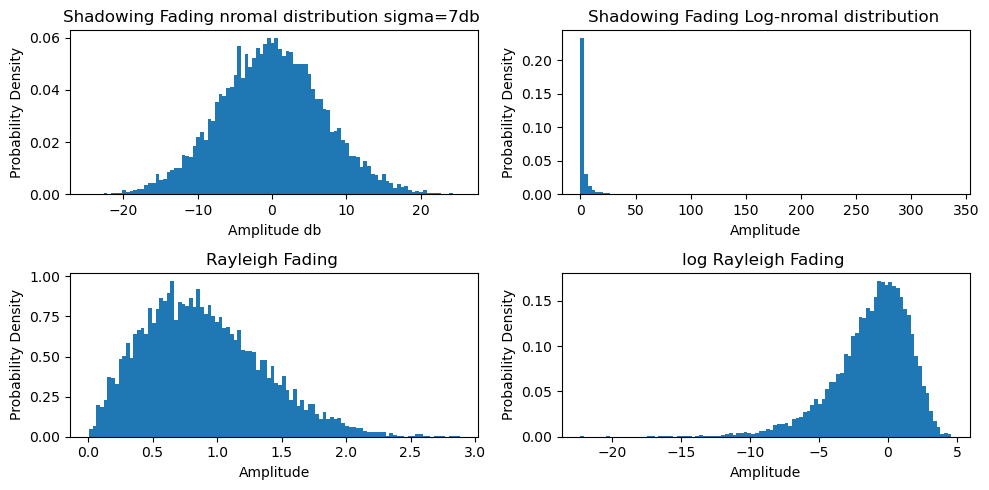

In [9]:
N = 10000
# Generate shadowing fading PDF
shadowing        = np.random.normal(scale=sigma_s, size=N)
shadowing_linear = 10**(0.1*shadowing)
# Generate Rayleigh fading
cos_theta = np.random.normal(scale=np.sqrt(0.5), size=N)
sin_theta = np.random.normal(scale=np.sqrt(0.5), size=N)
rayleigh_fading = np.abs(cos_theta + 1j * sin_theta)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Plot shadowing fading PDF
axs[0, 0].hist(shadowing, bins=100, density=True)
axs[0, 0].set_title('Shadowing Fading nromal distribution sigma=7db ')
axs[0, 0].set_xlabel('Amplitude db')
axs[0, 0].set_ylabel('Probability Density')

# Plot shadowing fading log normal distribution PDF
axs[0, 1].hist(shadowing_linear, bins=100, density=True)
axs[0, 1].set_title('Shadowing Fading Log-nromal distribution ')
axs[0, 1].set_xlabel('Amplitude')
axs[0, 1].set_ylabel('Probability Density')

# Plot Rayleigh fading PDF
axs[1, 0].hist(rayleigh_fading, bins=100, density=True)
axs[1, 0].set_title('Rayleigh Fading ')
axs[1, 0].set_xlabel('Amplitude')
axs[1, 0].set_ylabel('Probability Density')

# Plot Log Rayleigh fading log distribution PDF
axs[1, 1].hist(10*np.log10(rayleigh_fading), bins=100, density=True)
axs[1, 1].set_title('log Rayleigh Fading ')
axs[1, 1].set_xlabel('Amplitude')
axs[1, 1].set_ylabel('Probability Density')

# Adjust layout and display plots
fig.tight_layout()
plt.show()

In [5]:
# Free-space path loss at reference distance
PL_d0 = 20 * np.log10(4 * np.pi * d0* f/ c)
print("PL_d0 :{:} dB".format(PL_d0))
# Distance range for path loss curve   1 to 1000 m
d_range = np.linspace(1, 1000,num=1000)
# Path loss at distance d m
PL_d = PL_d0 + 10 * gamma * np.log10(d_range/d0) 
print("PL_d at 45 m:{:} dB".format(PL_d[45-1]))
# Received power at distance d m
Pr_d = Pt + Gant_ap + Gant_mob - PL_d 
print("Pr_d at 45 m:{:} dB".format(Pr_d[45-1]))
# consider shadowing  
Pr_d_shadowing = Pr_d + np.random.normal(scale=sigma_s, size=len(d_range))
print("Pr_d + shadowing at 45 m :{:} dB".format(Pr_d_shadowing[45-1]))
# Generate Rayleigh fading
cos_theta = np.random.normal(scale=np.sqrt(0.5), size=len(d_range))
sin_theta = np.random.normal(scale=np.sqrt(0.5), size=len(d_range))
rayleigh_fading = np.abs(cos_theta + 1j * sin_theta)
# consider multipath 
Pr_d_shadowing_multipath = Pr_d_shadowing + 10*np.log10(rayleigh_fading)
print("Pr_d + shadowing + multipath at 45 m :{:} dB".format(Pr_d_shadowing_multipath[45-1]))


PL_d0 :43.61114343652457 dB
PL_d at 45 m:110.08159989890937 dB
Pr_d at 45 m:-76.08159989890937 dB
Pr_d + shadowing at 45 m :-85.88064964427753 dB
Pr_d + shadowing + multipath at 45 m :-90.33059221099896 dB


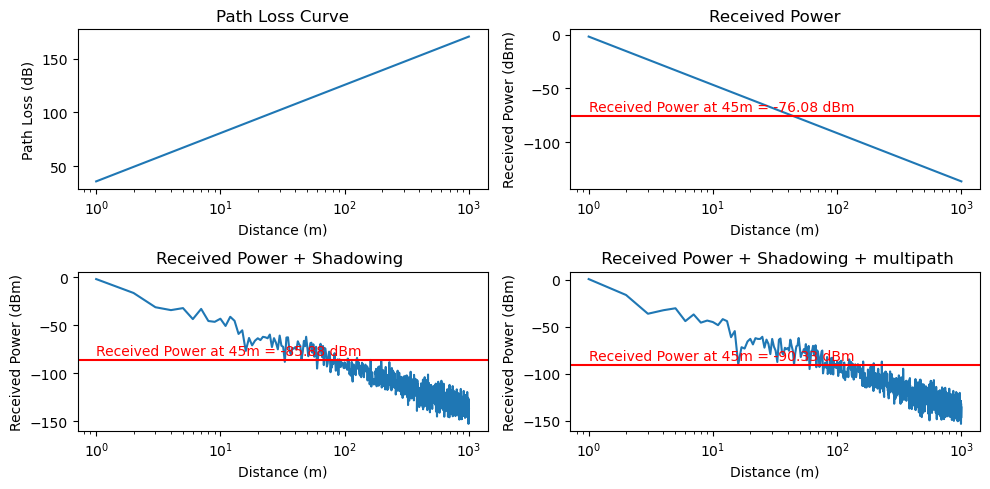

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
# Plot path loss curve
axs[0, 0].plot(d_range, PL_d)
axs[0, 0].set_title('Path Loss Curve')
axs[0, 0].set_xlabel('Distance (m)')
axs[0, 0].set_ylabel('Path Loss (dB)')
axs[0, 0].set_xscale('log')
# Plot received power vs. distance
axs[0, 1].plot(d_range, Pr_d)
axs[0, 1].set_title('Received Power')
axs[0, 1].set_xlabel('Distance (m)')
axs[0, 1].set_ylabel('Received Power (dBm)')
axs[0, 1].set_xscale('log')
axs[0, 1].axhline(y=Pr_d[45-1], color='r', linestyle='-')
axs[0, 1].text(1, Pr_d[45-1]+5, 'Received Power at 45m = {:.2f} dBm'.format(Pr_d[45-1]), color='r')
# Plot received power + Shadowing vs. distance with shadowing
axs[1, 0].plot(d_range, Pr_d_shadowing)
axs[1, 0].set_title('Received Power + Shadowing ')
axs[1, 0].set_xlabel('Distance (m)')
axs[1, 0].set_ylabel('Received Power (dBm)')
axs[1, 0].set_xscale('log')
axs[1, 0].axhline(y=Pr_d_shadowing[45-1], color='r', linestyle='-')
axs[1, 0].text(1, Pr_d_shadowing[45-1]+5, 'Received Power at 45m = {:.2f} dBm'.format(Pr_d_shadowing[45-1]), color='r')

# Plot received power + Shadowing + multipath vs. distance with shadowing
axs[1, 1].plot(d_range, Pr_d_shadowing_multipath)
axs[1, 1].set_title(' Received Power + Shadowing + multipath')
axs[1, 1].set_xlabel('Distance (m)')
axs[1, 1].set_ylabel('Received Power (dBm)')
axs[1, 1].set_xscale('log')
axs[1, 1].axhline(y=Pr_d_shadowing_multipath[45-1], color='r', linestyle='-')
axs[1, 1].text(1, Pr_d_shadowing_multipath[45-1]+5, 'Received Power at 45m = {:.2f} dBm'.format(Pr_d_shadowing_multipath[45-1]), color='r')

# Adjust layout and display plots
fig.tight_layout()
plt.show()


> ### b) Determine the probability that the local-mean received signal power $ Pr(d) $, is less than $ P_{min} $ in room HB17.160, at a distance of 75 m from the access point.

Reference book : Chapter 2.9 ,Outage Probability under Path Loss and Shadowing
$$p(Pr(d) \leq P_{min}) = 1-Q\left(\frac{P_{min} - (P_t +  G_{ant,ap} + G_{ant,mob} -  PL(d))}{\sigma_{\psi}dB}\right)$$

where:
- $P_{min}$ is the minimum received power threshold
- $\sigma_{\psi}dB$ is the standard deviation of the log-normal shadowing.

The Q-function is defined as the probability that a Gaussian random variable X with mean 0 and variance 1 is greater than z:
$$Q(z) = \frac{1}{\sqrt{2\pi}} \int_{z}^{\infty} e^{-y^2/2} dy$$

The conversion between the Q-function and complementary error function is:
$$Q(z) = \frac{1}{2} \mathrm{erfc} \left( \frac{z}{\sqrt{2}} \right)$$

In [18]:
# Received power at distance 75 m
Pr_d = Pt + Gant_ap + Gant_mob - PL_d[75-1] 
P_min = -84 # Received signal power threshold (dBm)
sigma_s = 7 # Standard deviation of log-normal shadow fading (dB)
z =  (P_min - Pr_d )/ sigma_s
outage_prob =  0.5 * math.erfc(z / np.sqrt(2))
print("Outage probability: {:.2%}".format(outage_prob))

Outage probability: 38.40%


> ### In the large laboratory room HB17.130/140, the amplitude fluctuation of the received signal power $P_r$ due to small scale fading is Rayleigh distributed and the local mean value of the received signal power is $Pr(d) = -82$ dBm.
>> ### c) Calculate the outage probability in this laboratory room.


In [19]:
Pr_d =  -82  # local mean value of the received signal power (dbm)
P_min = -84  # Received signal power threshold (dBm)
z =  (P_min - Pr_d )/ sigma_s
outage_prob =  0.5 * math.erfc(z / np.sqrt(2))
print("Outage probability: {:.2%}".format(outage_prob))

Outage probability: 61.25%


> ### In order to improve the reception performance the application of antenna diversity is investigated.Since our laptop is equipped with a single antenna, it is moved to different locations within laboratory room HB17.130/140.
>> ### d) Determine the probability that we find at least one location with sufficient signal strength when we try at four randomly selected locations.

Reference book :  Chapter 2.10,   Cell Coverage Area

- The cell coverage area in a cellular system is defined as the expected percentage of locations within a cell where the received power at these locations is above a given minimum.)